0304(화) 1주차 과제\
핸즈온 4장 모델 훈련 p.157-184

**이 장에서 배울 내용**
- 선형회귀
- 다항 회귀
    - 비선형 데이터셋에 훈련 가능, 좀 더 복잡
    - 과적합되기 쉬움
- 규제 기법
- 분류: 로지스틱 회귀, 소프트맥스 회귀


**선형 회귀 모델을 훈련시키는 두 가지 방법**
- 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터 (즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구합니다.
- 경사 하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킵니다. 결국에는 앞의 방법과 동일한 파라미터로 수렴합니다. 경사 하강법의 변종으로 신경망을 공부할 때 계속 사용하게 될 배치 경사 하강법, 미니배치 경사 하강법, 확률적 경사 하강법(SGD)도 살펴보겠습니다.

# 4.1 선형 회귀

**선형 회귀 모델**

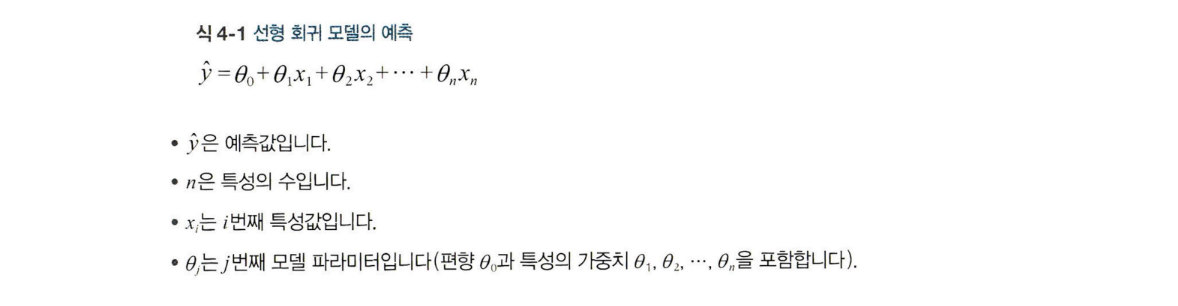

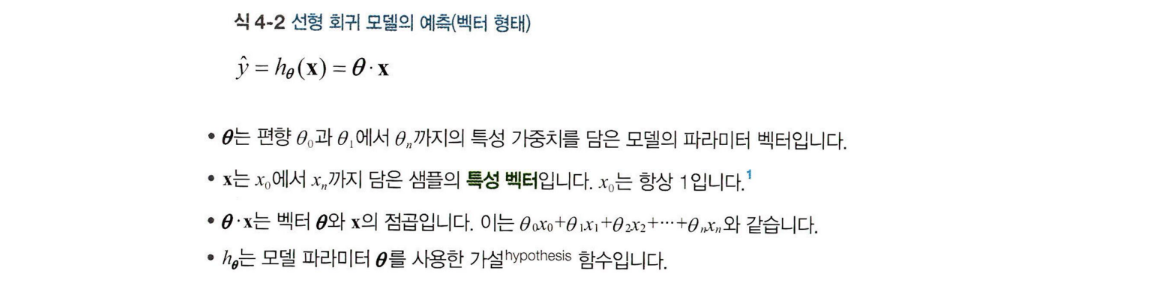

**선형 회귀 모델의 훈련**

- 모델 파라미터 설정
    - 모델이 훈련 데이터에 들어맞는 정도 측정해야 함
        - RMSE를 최소화하는 θ찾기
        - MSE를 최소화하는 θ찾기

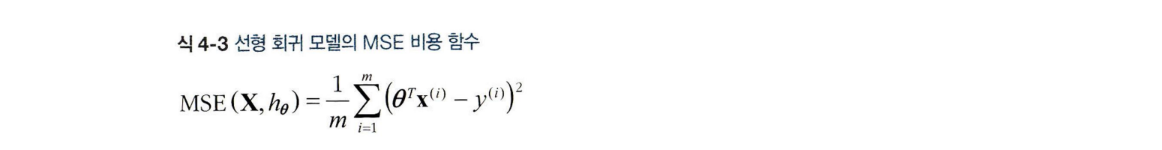

## 4.1.1 정규방정식

**정규방정식**
: 비용 함수를 최소화하는 θ값을 바로 찾을 수  있는 해석적인 방법

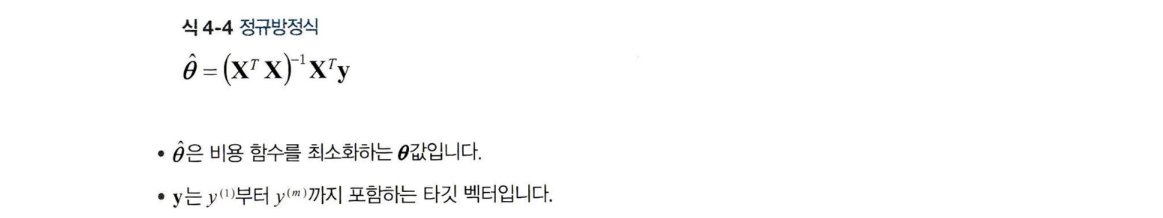

In [25]:
# 데이터 생성
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

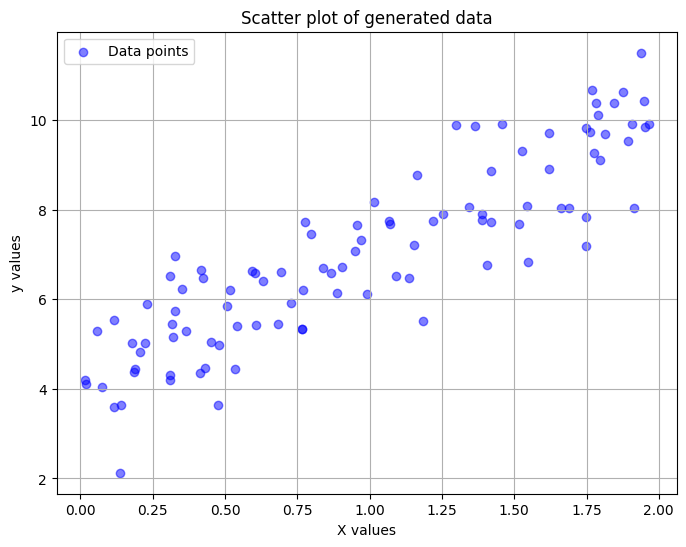

In [26]:
# scatter plot 생성
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label="Data points")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Scatter plot of generated data")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# 정규방정식으로 θ^ 계산

X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    이 데이터를 생성하기 위해 생성한 함수: y = 4 + 3x1 + 가우시안잡음

In [28]:
# 계산한 값 확인

theta_best

array([[4.12187834],
       [2.956953  ]])

    기대한 파라미터: θ0 = 4, θ1 = 3
    재현한 파라미터: θ0 = 4.582, θ1 = 2.491

    -> 매우 비슷하지만 잡음 때문에 정확하진 X

In [29]:
# θ^을 사용해 예측

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.12187834],
       [10.03578434]])

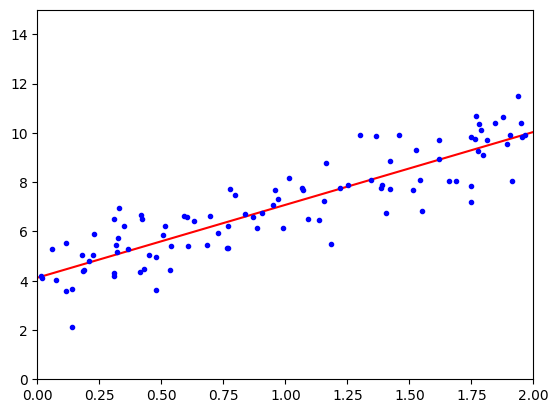

In [30]:
# 모델의 예측 그래프로 나타내기

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

---

**사이킷런에서 선형 회귀 수행**

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [32]:
lin_reg.intercept_, lin_reg.coef_

(array([4.12187834]), array([[2.956953]]))

In [33]:
lin_reg.predict(X_new)

array([[ 4.12187834],
       [10.03578434]])

- **scipy.linalg.lstsq() 함수**
    - LinearRegression 클래스의 기반이 됨
    - 바로 호출할 수 있음

In [34]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.12187834],
       [2.956953  ]])

    - 이 함수는 θ^ = X+ * y 을 계산함
    - 여기서 X+ 는 X의 유사역행렬(정확히는 무어-펜로즈 역행렬)

- **np.linalg.pinv() 함수**
    - 유사역행렬을 직접 구할 수 있음

In [35]:
np.linalg.pinv(X_b).dot(y)

array([[4.12187834],
       [2.956953  ]])

- **유사역행렬**
    - 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됨
    - SVD: 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U \Sigma V^T$ 로 분해함
    - 유사역행렬은 $X^+ = V \Sigma^+ U^T$ 로 계산됨



- **$Sigma^+$ 계산하기**
    1. 알고리즘이 $Sigma$를 먼저 구함
    2. 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈
    3. 0이 아닌 모든 값을 역수로 치환
    4. 만들어진 행렬을 전치함

## 4.1.2 계산 복잡도

**정규방정식**: (n+1)*(n+1) 크기가 되는 $X^TX$의 역행렬을 계산함 (n은 특성 수)

**계산 복잡도**: 일반적으로 $O(n^{2.4})$ 와 $O(n^{3})$ 사이

-> 특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4}$=5.3 에서 $2^3$=8 배로 증가함

---

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^{2})$

- 예측 계산 복잡도는 샘플 수와 특성 수에 선형적. 즉, 예측하려는 샘플이 두 배로 늘어나면 걸리는 시간도 거의 두 배 증가함.

# 4.2 경사 하강법

- **경사 하강법**
    - 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때
    - 비용 함수를 최적화하기 위해 반복해서 파라미터 조정
    

- **경사 하강법의 과정**

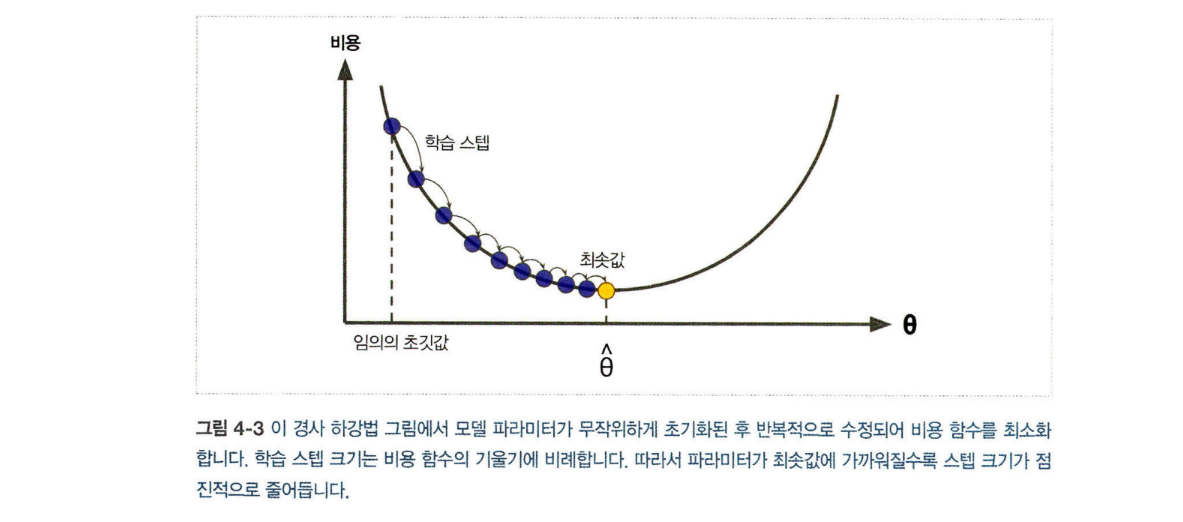

    - θ를 임의의 값으로 시작(무작위 초기화)
    - 한 번에 조금씩 비용 함수(ex. MSE)가 감소되는 방향으로 진행
    - 알고리즘에 최솟값에 수렴할 때까지 점진적으로 향상시킴

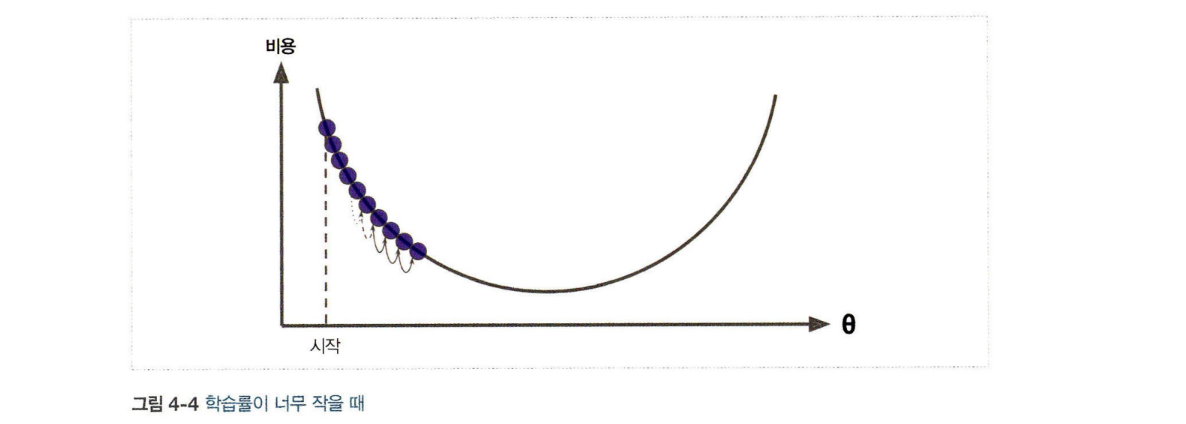

    - 학습률 파라미터: 스텝의 크기 결정
    - 너무 작으면 시간이 오래 걸림

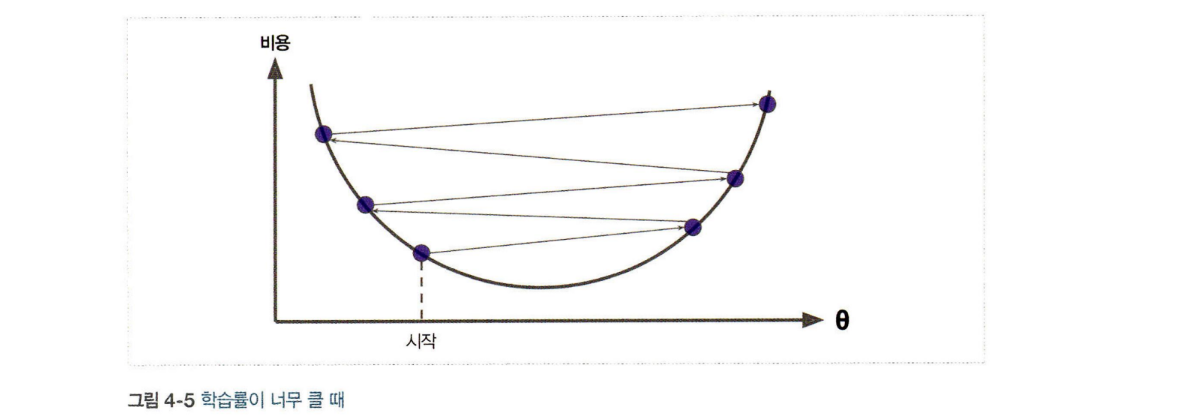

    - 너무 크면 지나칠 수 있음

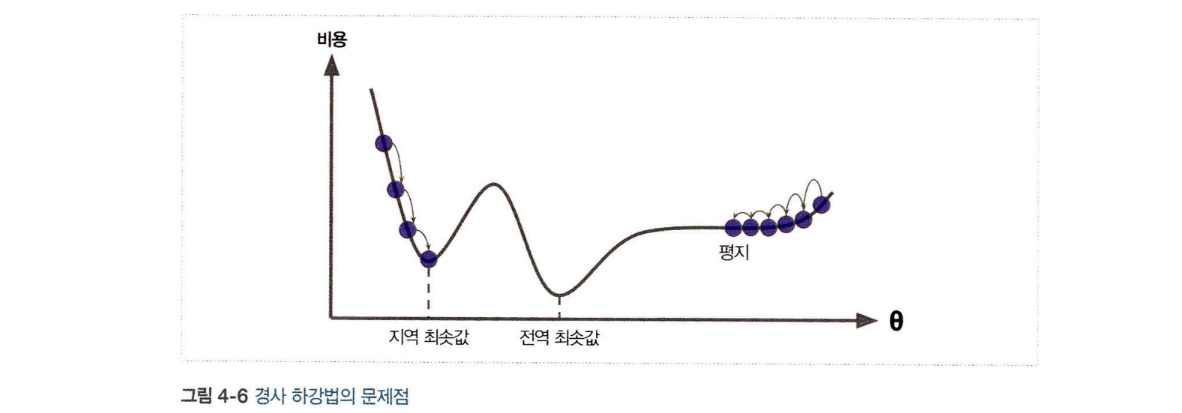

    - 경사 하강법의 두 가지 문제점
        1. 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴
        2. 일찍 멈춰서 도달X

- 다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록 함수**

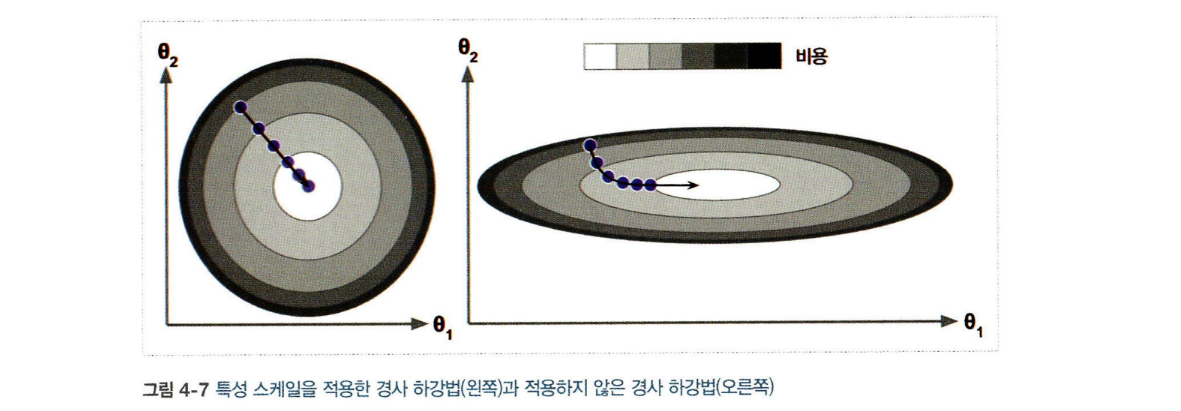

    - 비용 함수는 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있음.

    - 왼쪽: 특성1과 특성2의 스케일이 같음 -> 빠르게 도달
    - 오른쪽: 특성1이 더 작음 -> 오래 걸림

    - 따라서 경사 하강법을 사용할 때에는 StandardScaler 등을 이용해 모든 특성이 같은 스케일을 갖도록 만들어야 함

## 4.2.1 배치 경사 하강법

- **편도 함수**: $\theta_j$ 가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산하는 함수 ($\theta_j$ 에 대한 비용 함수의 그레디언트)

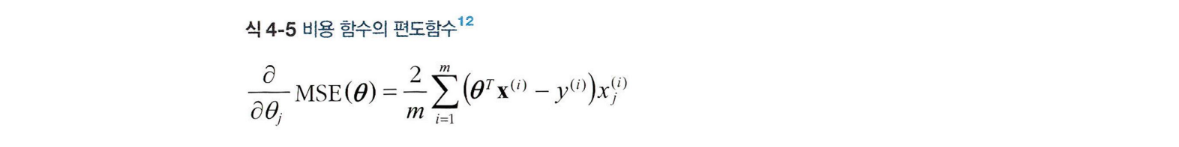

- 편도 함수를 각각 계산하는 대신 [식 4-6]을 사용해 한꺼번에 계산할 수 있음
- 그레디언트 벡터 $\nabla_{\theta} \text{MSE}(\theta)$ 는 비용 함수의 편도 함수를 모두 담고 있음


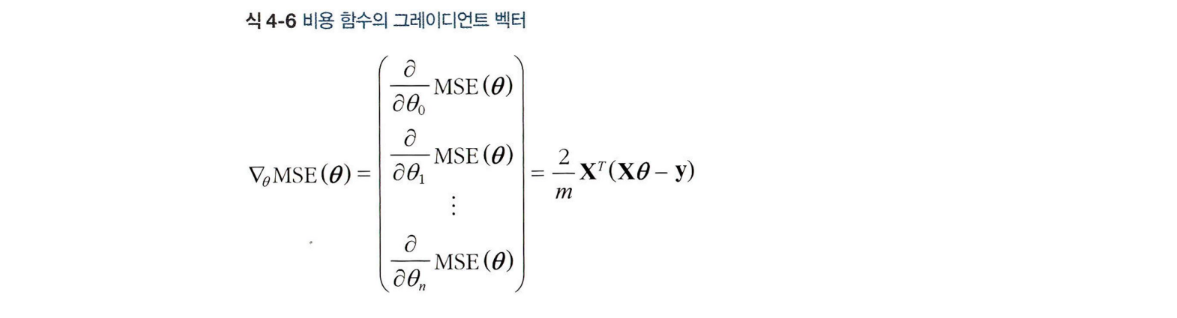

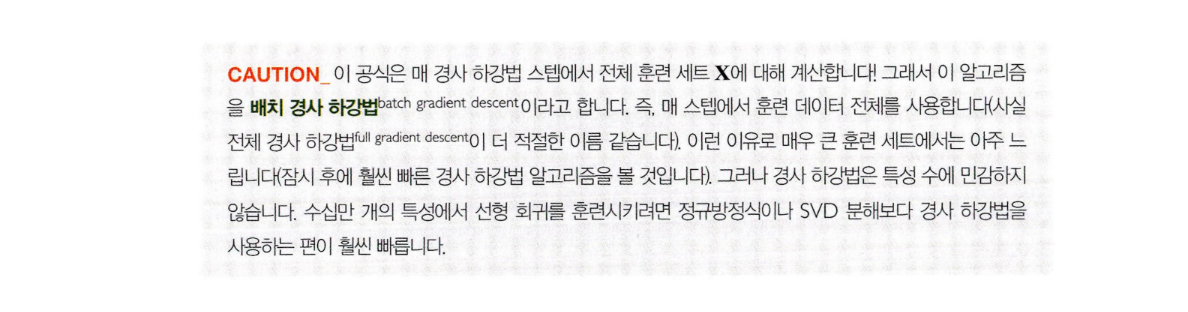

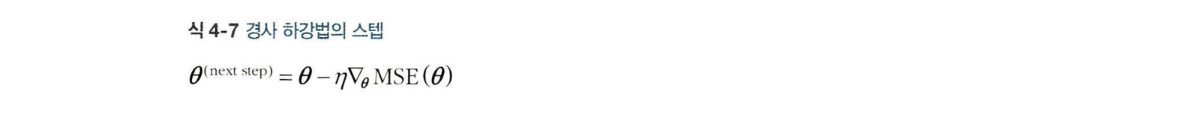

- 위로 향하는 그레디어트 벡터가 구해지면 반대로 가야 함.
- θ에서 $\nabla_{\theta} \text{MSE}(\theta)$를 빼야 함
- **학습률 $\eta$** 를 그레디어트 벡터에 곱해 내려가는 스텝의 크기를 결정함

In [36]:
# 알고리즘 구현

eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [37]:
theta

array([[4.12187834],
       [2.956953  ]])

    -> 정규 방정식으로 찾은 것과 같음

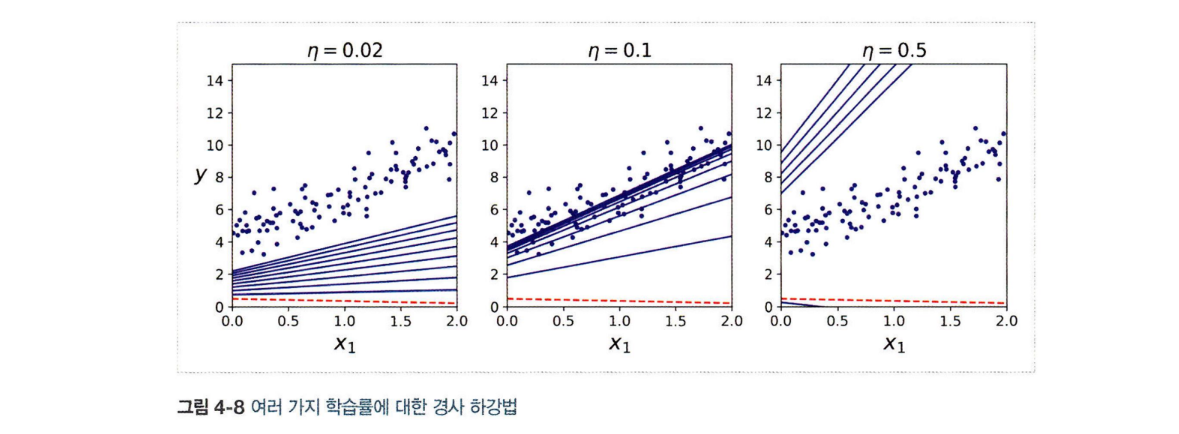

    - 가운데가 학습률이 적절해 보임.

- **그리드 탐색**
    - 적절한 학습률을 찾는 방법
    - 너무 오래 걸리지 않게 하기 위해 반복 횟수를 제한함

-> 반복 횟수를 아주 크게 지정하고, 벡터의 노름이 어떤 값 $\epsilon$ (허용오차) 보다 작아지면 알고리즘을 중지한다

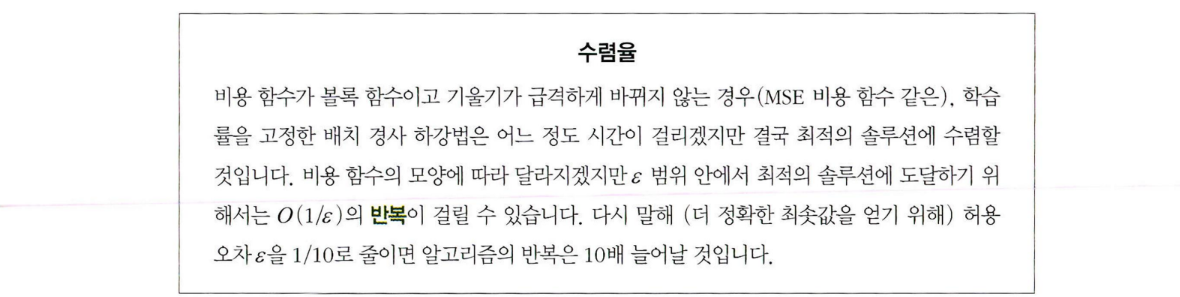

## 4.2.2 확률적 경사 하강법

- **배치 경사 하강법의 문제점**: 매 스텝에서 전체 훈련 세트를 사용해 그레디언트 계산 -> 훈련 세트가 커지면 매우 느려짐

- **확률적 경사 하강법의 해결**: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그  하나에 대한 그레디언트를 계산함 -> 훨씬 빨라짐

- **확률적 경사 하강법의 문제점**: 위아래로 요동치며 평균적으로 감소 -> 배치 경사 하강법보다 불안정. 최솟값에 가까워지지만 안착하지 못하게 됨

단, [그림 4-6]처럼 비용 함수가 매우 불규칙할 경우 확률적 경사 하강법이 더 굿

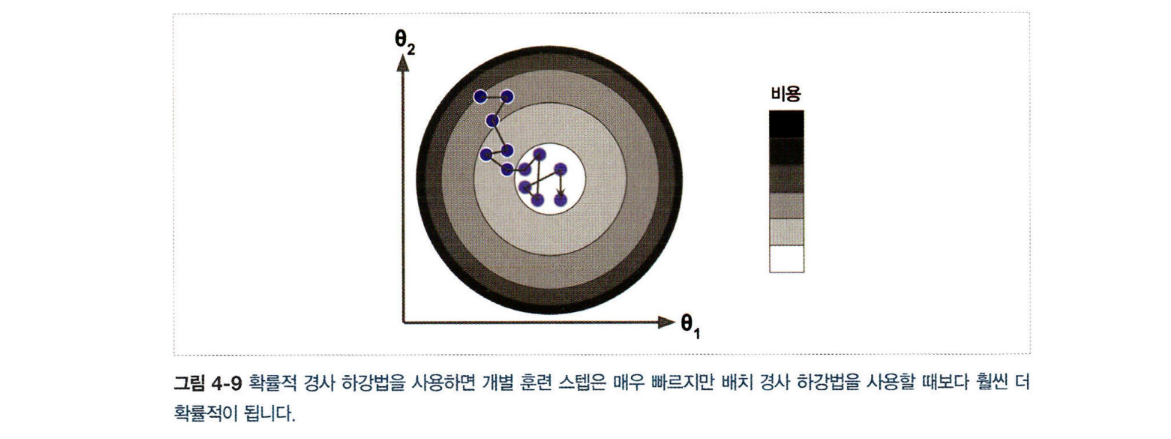

In [40]:
# 확률적 경사 하강법 구현

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i )
        theta = theta - eta * gradients

In [41]:
theta

array([[4.12809217],
       [2.90207615]])

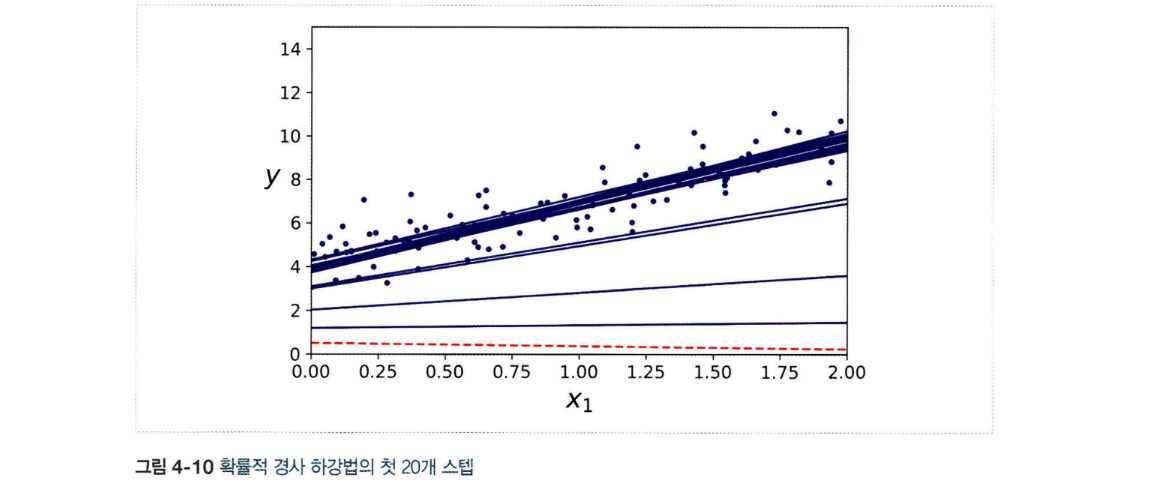

In [42]:
# 사이킷런에서 SGD 방식으로 선형 회귀 사용

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [43]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.131986]), array([3.00025448]))

    - 정규 방정식으로 구한 것과 매우 비슷한 값

## 4.2.3 미니배치 경사 하강법

- 배치 경사 하강법: 각 스텝에서 전체 훈련 세트를 기반으로 그레디언트 계산
- 확률적 경사 하강법: 하나의 샘플 기반
- **미니배치 경사 하강법**: 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트 계산
    - 장점: GPU를 사용해서 얻는 성능 향상

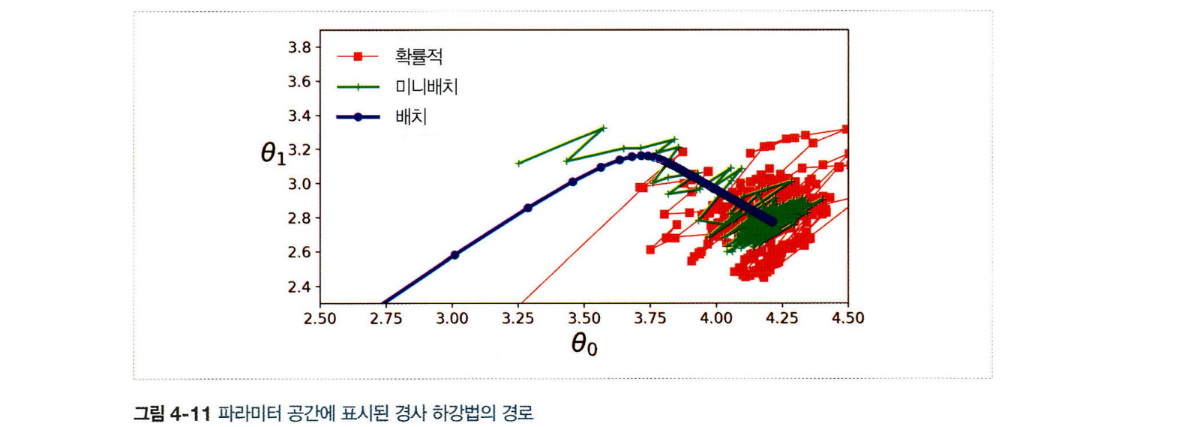

    - 배치 경사 하강법: 실제 최솟값에서 멈춤
    - 확률적, 미니배치: 그처에서 맴돎

    but
    배치 경사: 오래걸림(-) & 확률적,미니배치: 적절한 학습 스케줄 사용시 도달 가능(+)

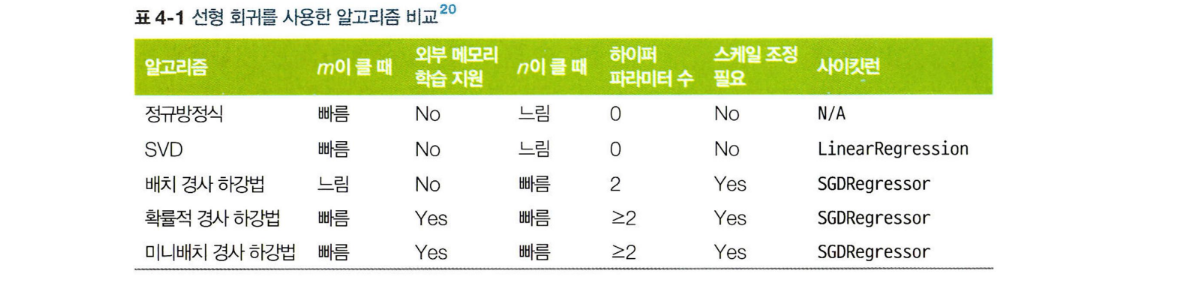

    - m: 훈련 샘플 수
    - n: 특성 수


# 4.3 다항 회귀

- 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음.
- **다항 회귀**: 각 특성의 거듭제곱을 새로운 특성으로 추가, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킴

In [44]:
# 2차방정식으로 비선형 데이터 생성

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

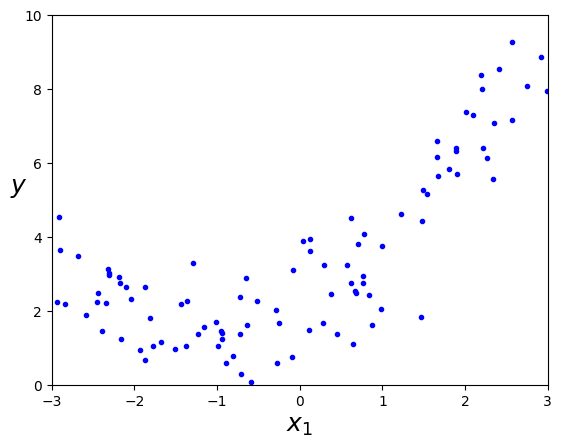

In [45]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [46]:
# 직선에 데이터가 맞지 않음 -> 사이킷런의 PolynomialFeatures 로 훈련 데이터 변환

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [47]:
X[0]

array([-0.94694716])

In [48]:
X_poly[0]

array([-0.94694716,  0.89670893])

    - X_poly는 원래 특성 X와 그 제곱을 포함함

In [49]:
# 확장된 훈련 데이터에 LinearRegression 적용

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00442199]), array([[1.07262151, 0.51330123]]))

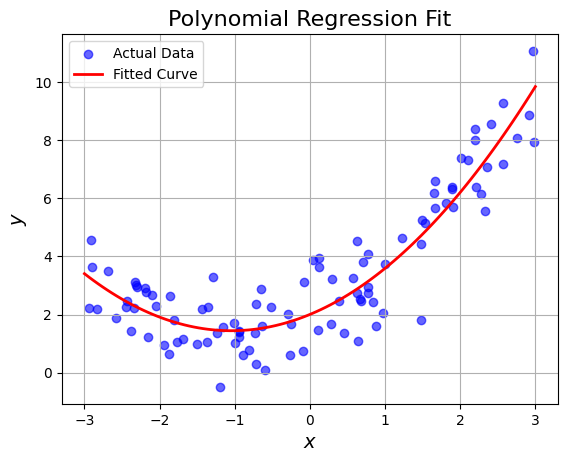

In [54]:
# 시각화

import numpy as np
import matplotlib.pyplot as plt

# X 범위를 설정하여 곡선을 부드럽게 만들기
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)  # 변환된 X값

# 학습된 모델의 계수 가져오기
intercept = lin_reg.intercept_[0]  # 절편
coef_1 = lin_reg.coef_[0][0]  # X의 계수
coef_2 = lin_reg.coef_[0][1]  # X^2의 계수

# 모델의 예측 곡선
y_pred = intercept + coef_1 * X_new + coef_2 * X_new**2

# 실제 데이터 플롯
plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.6)

# 학습된 곡선 플롯
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Fitted Curve")

# 축 및 레이블 설정
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Polynomial Regression Fit", fontsize=16)
plt.legend()
plt.grid(True)

plt.show()

- 특성이 여러 개일 때 다항 회귀는 특성 사이의 관계를 찾을 수 있음(선형에선X)
- 예를 들어 특성 a,b가 있을 때 degree=3으로 PolynimialFeatures를 적용하면 $a^2, a^3, b^2, b^3$ 뿐만 아니라 $ab, a^2b, ab^2$도 특성으로 추가함

* PolynomialFeatures(degree=d)는 특성이 n개인 배열을 특성이 $\frac{(n + d)!}{d! \, n!}$ 개인 배열로 변환함

# 4.4 학습 곡선

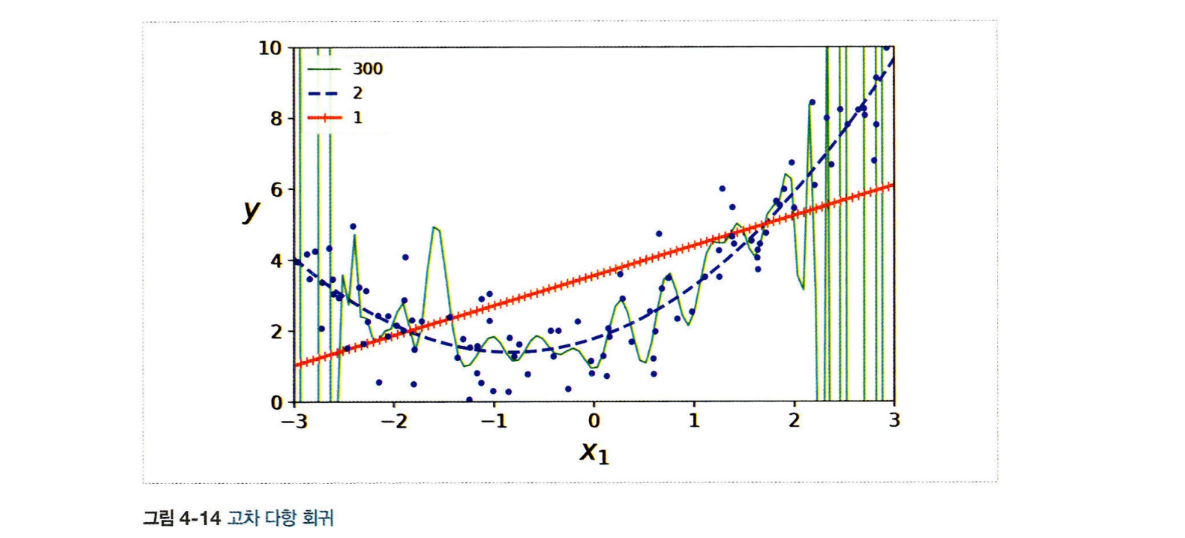

    - 고차 다항 회귀 모델: 과적합
    - 선형 모델: 과소적합
    - 2차 다항 회귀: 가장 일반화가 잘됨

- **일반화 성능 추정 방법**
    - 교차 검증
        - 성능 good, 교차검증점수 bad => 과적합
        - 성능 bad, 교차검증점수 bad => 과소적합
    - **학습 곡선**
        - 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(or 훈련 반복)의 함수로 나타냄.
        - 방법: 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시킨다.

In [63]:
# 모델의 학습 곡선을 그리는 함수 정의

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

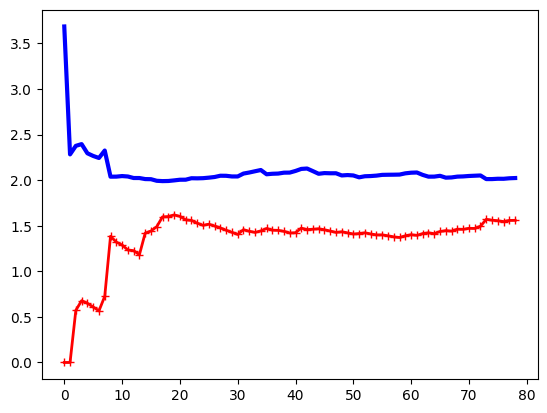

In [64]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

    - 과소적합됨

- 훈련 데이터의 성능
    - 그래프가 0에서 시작 -> 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동
    - 샘플이 추가될수록 완벽학습이 불가능해짐 -> 오차가 계속 상승
    - 이 때는 룬련 세트에 샘플이 추가되어도 평균 오차가 크게 변화하지 X

- 검증 데이터에 대한 모델의 성능
    - 적은 수의 훈련 샘플 -> 제대로 일반화될수X, 검증 오차가 초기에 매우 큼
    - 훈련 샘플이 추가될 수록 검증 오차 감소
    - 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해짐(오차가 많이 작아지지 않음) -> 훈련 세트와 가까워짐

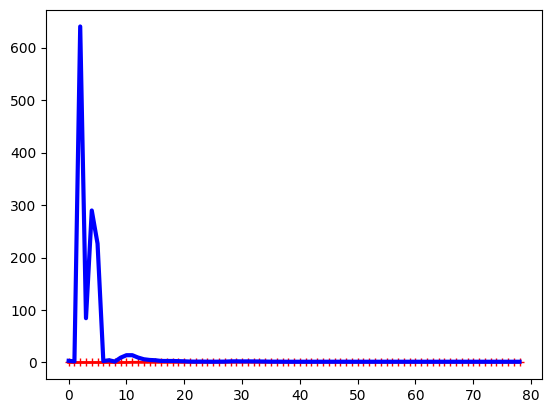

In [65]:
# 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curve(polynomial_regression, X, y)

- 10차 다항 회귀의 학습 곡선과 이전 그래프의 차이점
    - 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
    - 두 곡선 사이에 공간이 있음. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 과적합의 특징임. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

- 과대적합 모델을 개선하는 방법: 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것

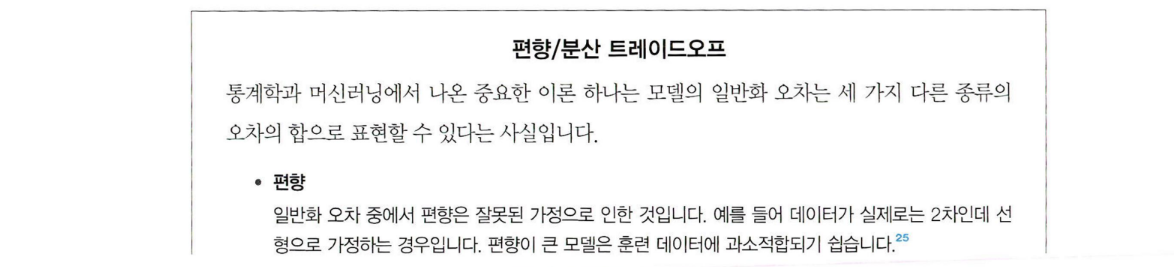

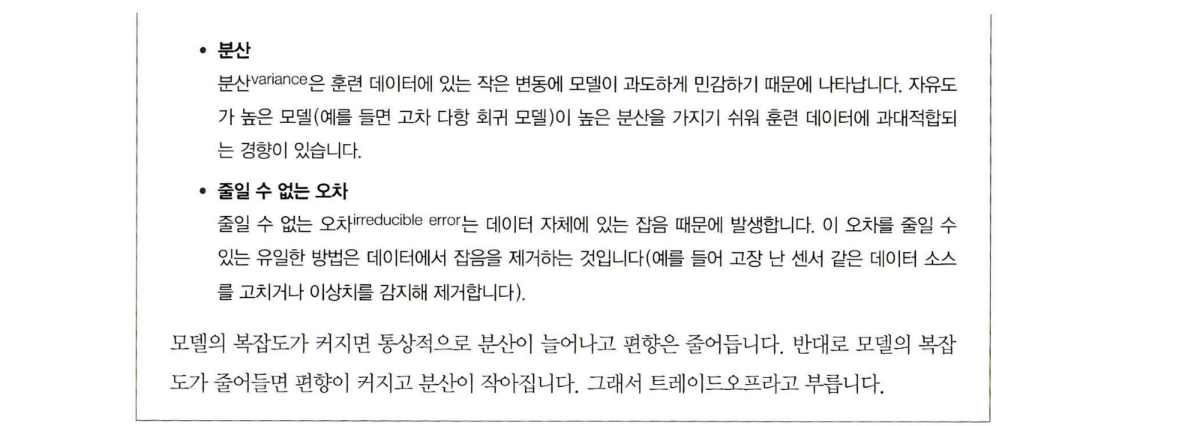